In [68]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import sweetviz as sv
import ydata
import dtale

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [11]:
# pip install dtale
#test_sweetviz

print("dtale imported successfully!")

dtale imported successfully!


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [44]:
ra = pd.read_csv('realEstate.csv')

In [73]:
ra

,price,refresh,beds,livings,wc,area,street_width,age,latest update,مطبخ,ac,furnished,district,width,length,advertiser_type,creation date,review,IsRent
0,20000,2022-08-06,3,0,2,225.0,15.0,9.0,2022-08-06,True,False,False,حي النظيم,15.0,15.0,owner,2022-08-05,5.00,False
1,25000,2022-08-06,3,1,2,130.0,30.0,12.0,2022-08-06,True,False,False,حي الفيحاء,0.0,0.0,exclusive_marketer,2022-08-06,4.33,True
2,22000,2022-08-06,3,1,2,200.0,25.0,0.0,2022-08-06,False,False,False,حي الرمال,10.0,20.0,normal_marketer,2022-07-24,4.67,True
3,38000,2022-08-06,1,1,1,120.0,34.0,0.0,2022-08-06,True,True,False,حي العقيق,0.0,0.0,owner,2022-03-10,4.17,False
4,25000,2022-08-03,1,1,1,60.0,39.0,9.0,2022-08-03,True,True,False,حي التعاون,7.0,9.0,normal_marketer,2022-07-05,4.42,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,60000,2022-08-05,3,1,2,180.0,18.0,0.0,2022-08-05,True,True,False,حي النرجس,0.0,0.0,exclusive_marketer,2022-07-20,4.31,False
6758,9800,2022-07-30,2,1,1,90.0,5.0,25.0,2022-07-30,False,False,False,حي غبيرة,0.0,0.0,exclusive_marketer,2021-04-16,4.82,False
6759,50000,2022-08-02,3,1,2,120.0,20.0,5.0,2022-08-02,True,True,True,حي اليرموك,11.0,11.0,owner,2022-06-21,5.00,False
6760,40000,2022-08-05,2,2,2,200.0,15.0,1.0,2022-08-05,True,True,False,حي النرجس,20.0,10.0,exclusive_marketer,2022-08-02,4.54,False


In [5]:
# for dtale don't run
#rav = dtale.show(ra)
#rav.open_browser()

In [ ]:
# Modify last_update in-place to store only the date
#ra['last_update'] = ra['last_update'].apply(lambda x: pd.to_datetime(eval(x)[0]).date())
#ra['refresh'] = ra['refresh'].apply(lambda x: pd.to_datetime(eval(x)[0]).date())
#ra['create_time'] = ra['create_time'].apply(lambda x: pd.to_datetime(eval(x)[0]).date())
# Show the DataFrame in D-Tale
#rav =  dtale.show(ra)
# Optionally, open the D-Tale app in your browser
#rav.open_browser()

In [ ]:
# Custom Filtering is currently disabled. 
# This feature is only for trusted environments.
# To unlock this feature, you must do one of the following:

# Option 1: Add "enable_custom_filters=True" to your dtale.show call

# Example usage
#d = dtale.show(ra, enable_custom_filters=True)

# Option 2: Run this code before calling dtale.show
#import dtale.global_state as global_state

# Enable custom filters in the global settings
#global_state.set_app_settings(dict(enable_custom_filters=True))

# Now you can call dtale.show
#d = dtale.show(ra)
#rav.open_browser()

# Option 3: Add "enable_custom_filters = True" to the [app] section of your dtale.ini config file
# [app]
# enable_custom_filters = True


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [47]:
ra.dtypes

user_id              int64
id                   int64
title               object
price                int64
content             object
imgs                object
refresh             object
beds                 int64
livings            float64
wc                   int64
area               float64
street_width       float64
age                float64
last_update         object
ketchen            float64
ac                 float64
furnished          float64
location            object
path                object
district            object
width              float64
length             float64
advertiser_type     object
create_time         object
review             float64
profileImg          object
UserName            object
iam_verified        object
onMarket             int64
IsRent                bool
dtype: object

In [70]:
ra.columns

Index(['price', 'refresh', 'beds', 'livings', 'wc', 'area', 'street_width',
       'age', 'latest update', 'kitchen', 'ac', 'furnished', 'district',
       'width', 'length', 'advertiser_type', 'creation date', 'review',
       'IsRent'],
      dtype='object')

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [49]:
#change float type to int 
ra['livings'] = ra['livings'].fillna(0).astype(int)

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [51]:
# Rename the column
ra.rename(columns={'ketchen': 'kitchen'}, inplace=True)
ra.rename(columns={'last_update': 'latest update'}, inplace=True)
ra.rename(columns={'create_time': 'creation date'}, inplace=True)

In [52]:
#change float type to boolean 
ra['kitchen'] = ra['kitchen'].fillna(0).astype(bool)
ra['ac'] = ra['ac'].fillna(0).astype(bool)
ra['furnished'] = ra['furnished'].fillna(0).astype(bool)

In [72]:
ra.rename(columns={'kitchen': 'مطبخ'}, inplace=True)

C:\Users\queen\AppData\Local\Temp\ipykernel_2640\1326746452.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [53]:
columns_to_drop = ['user_id', 'id', 'title', 'content', 'imgs', 
                   'location', 'path', 'profileImg', 
                   'UserName', 'iam_verified', 'onMarket']

# Dropping the specified columns
ra.drop(columns=columns_to_drop, inplace=True)

In [66]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1]:
#Display number missing values per column

In [68]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [55]:
#change string type to date 
ra['latest update'] = ra['latest update'].apply(lambda x: pd.to_datetime(eval(x)[0]).date())
ra['refresh'] = ra['refresh'].apply(lambda x: pd.to_datetime(eval(x)[0]).date())
ra['creation date'] = ra['creation date'].apply(lambda x: pd.to_datetime(eval(x)[0]).date())

In [2]:
# check columns types 

In [33]:
# go to clean them 

In [3]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [107]:
# Identify outliers in the price column
outliers = ra[(ra['السعر'] < 1150) | (ra['السعر'] > 80000)]

# Display the outliers
print(outliers)

Empty DataFrame
Columns: [السعر, تاريخ التحديث, غرف النوم, غرف المعيشة, الحمام, المساحة, عرض الشارع, العمر, اخر تحديث, مطبخ, مكيفات, مفروشة, الحي, العرض, الطول, نوع المعلن, تاريخ الإنشاء, مراجعة, للإيجار, Cluster, price_range]
Index: []

[0 rows x 21 columns]


In [105]:
# Remove NaN values and values between 1150 and 80000 in the 'السعر' column
ra_cleaned = ra.dropna(subset=['السعر'])  # Drop rows where 'السعر' is NaN
ra_cleaned = ra_cleaned[(ra_cleaned['السعر'] < 1150) | (ra_cleaned['السعر'] > 80000)]  # Filter the DataFrame

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [111]:
# Print rows where 'السعر' is NaN
nan_values = ra[ra['السعر'].isna()]
print("Rows with NaN values in 'السعر':")
print(nan_values)

Rows with NaN values in 'السعر':
Empty DataFrame
Columns: [السعر, تاريخ التحديث, غرف النوم, غرف المعيشة, الحمام, المساحة, عرض الشارع, العمر, اخر تحديث, مطبخ, مكيفات, مفروشة, الحي, العرض, الطول, نوع المعلن, تاريخ الإنشاء, مراجعة, للإيجار, Cluster, price_range]
Index: []

[0 rows x 21 columns]


In [62]:
# Replace NaN values with 0
ra.fillna(0, inplace=True)

C:\Users\queen\AppData\Local\Temp\ipykernel_2640\2849999905.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
# List of columns to check for NaN values
columns_to_check = [
    'price', 'refresh', 'beds', 'livings', 'wc', 'area', 
    'street_width', 'age', 'latest update', 'kitchen', 
    'ac', 'furnished', 'district', 'width', 'length', 
    'advertiser_type', 'creation date', 'review', 'IsRent'
]

# Filter the DataFrame to show rows with NaN values in the specified columns
nan_rows = ra[ra[columns_to_check].isna().any(axis=1)]

# Check each column for NaN values and display the rows
for column in columns_to_check:
    nan_rows = ra[ra[column].isna()]
    print(f"Rows with NaN in '{column}':")
    print(nan_rows)
    print("\n" + "-"*50 + "\n")  # Separator for clarity

Rows with NaN in 'price':
Empty DataFrame
Columns: [price, refresh, beds, livings, wc, area, street_width, age, latest update, kitchen, ac, furnished, district, width, length, advertiser_type, creation date, review, IsRent]
Index: []

--------------------------------------------------

Rows with NaN in 'refresh':
Empty DataFrame
Columns: [price, refresh, beds, livings, wc, area, street_width, age, latest update, kitchen, ac, furnished, district, width, length, advertiser_type, creation date, review, IsRent]
Index: []

--------------------------------------------------

Rows with NaN in 'beds':
Empty DataFrame
Columns: [price, refresh, beds, livings, wc, area, street_width, age, latest update, kitchen, ac, furnished, district, width, length, advertiser_type, creation date, review, IsRent]
Index: []

--------------------------------------------------

Rows with NaN in 'livings':
Empty DataFrame
Columns: [price, refresh, beds, livings, wc, area, street_width, age, latest update, kitchen, 

In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [76]:
import pandas as pd

# Assuming 'ra' is your DataFrame already loaded from a CSV
# ra = pd.read_csv('your_file.csv')  # Uncomment this line if you need to load the DataFrame

# Dictionary to map old column names to new Arabic names
column_mapping = {
    'price': 'السعر',
    'refresh': 'تاريخ التحديث',
    'beds': 'غرف النوم',
    'livings': 'غرف المعيشة',
    'wc': 'الحمام',
    'area': 'المساحة',
    'street_width': 'عرض الشارع',
    'age': 'العمر',
    'latest update': 'اخر تحديث',
    'ac': 'مكيفات',
    'furnished': 'مفروشة',
    'district': 'الحي',
    'width': 'العرض',
    'length': 'الطول',
    'advertiser_type': 'نوع المعلن',
    'creation date': 'تاريخ الإنشاء',
    'review': 'مراجعة',
    'IsRent': 'للإيجار'
}

# Renaming the columns
ra.rename(columns=column_mapping, inplace=True)

# Display the modified DataFrame
print(ra.columns)


Index(['السعر', 'تاريخ التحديث', 'غرف النوم', 'غرف المعيشة', 'الحمام',
       'المساحة', 'عرض الشارع', 'العمر', 'اخر تحديث', 'مطبخ', 'مكيفات',
       'مفروشة', 'الحي', 'العرض', 'الطول', 'نوع المعلن', 'تاريخ الإنشاء',
       'مراجعة', 'للإيجار'],
      dtype='object')


C:\Users\queen\AppData\Local\Temp\ipykernel_2640\1155145388.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

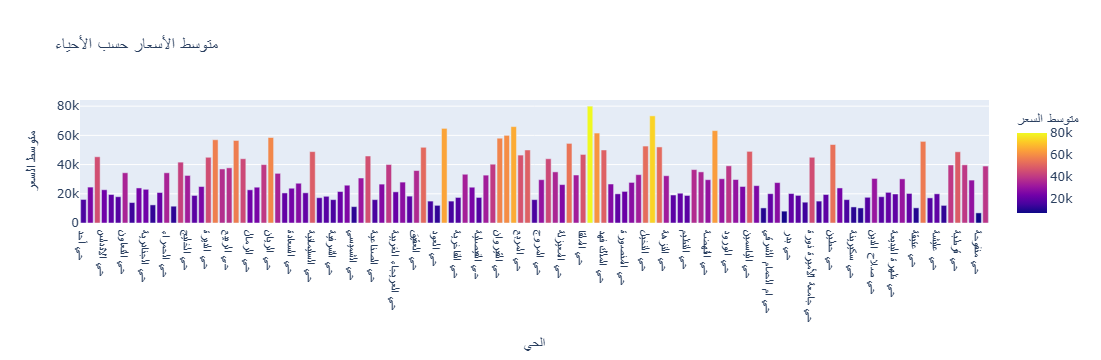

In [108]:


# Calculate average prices by district
average_prices = ra.groupby('الحي')['السعر'].mean().reset_index()

# Create a bar chart using Plotly
fig = px.bar(
    average_prices, 
    x='الحي', 
    y='السعر', 
    title='متوسط الأسعار حسب الأحياء',
    labels={'السعر': 'متوسط السعر', 'الحي': 'الحي'},
    color='السعر'  # Color by average price for better visualization
)

# Show the figure
fig.show()


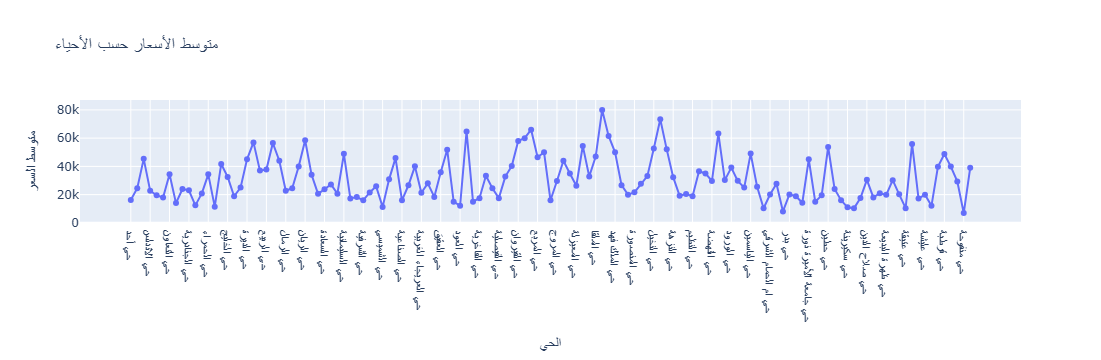

In [109]:

average_prices = ra.groupby('الحي')['السعر'].mean().reset_index()

# Create a line chart using Plotly
fig = px.line(
    average_prices, 
    x='الحي', 
    y='السعر', 
    title='متوسط الأسعار حسب الأحياء',
    labels={'السعر': 'متوسط السعر', 'الحي': 'الحي'},
    markers=True  # Add markers for better visibility
)

# Show the figure
fig.show()


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

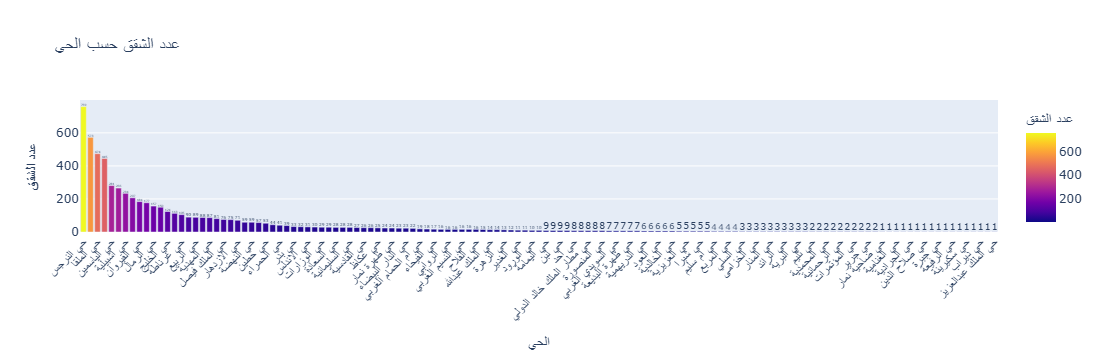

In [115]:
import pandas as pd
import plotly.express as px

# Load your dataset
# ra = pd.read_csv('your_file.csv')  # Uncomment to load your dataset

# Count the number of apartments in each district
district_counts = ra['الحي'].value_counts().reset_index()
district_counts.columns = ['الحي', 'عدد الشقق']

# Create a bar chart
fig = px.bar(
    district_counts,
    x='الحي',
    y='عدد الشقق',
    title='عدد الشقق حسب الحي',
    labels={'عدد الشقق': 'عدد الشقق', 'الحي': 'الحي'},
    color='عدد الشقق',  # Optional: color the bars by count
    text='عدد الشقق'  # Show counts on the bars
)

# Update layout for better aesthetics
fig.update_layout(xaxis_title='الحي', yaxis_title='عدد الشقق', xaxis_tickangle=-45)

# Show the figure
fig.show()


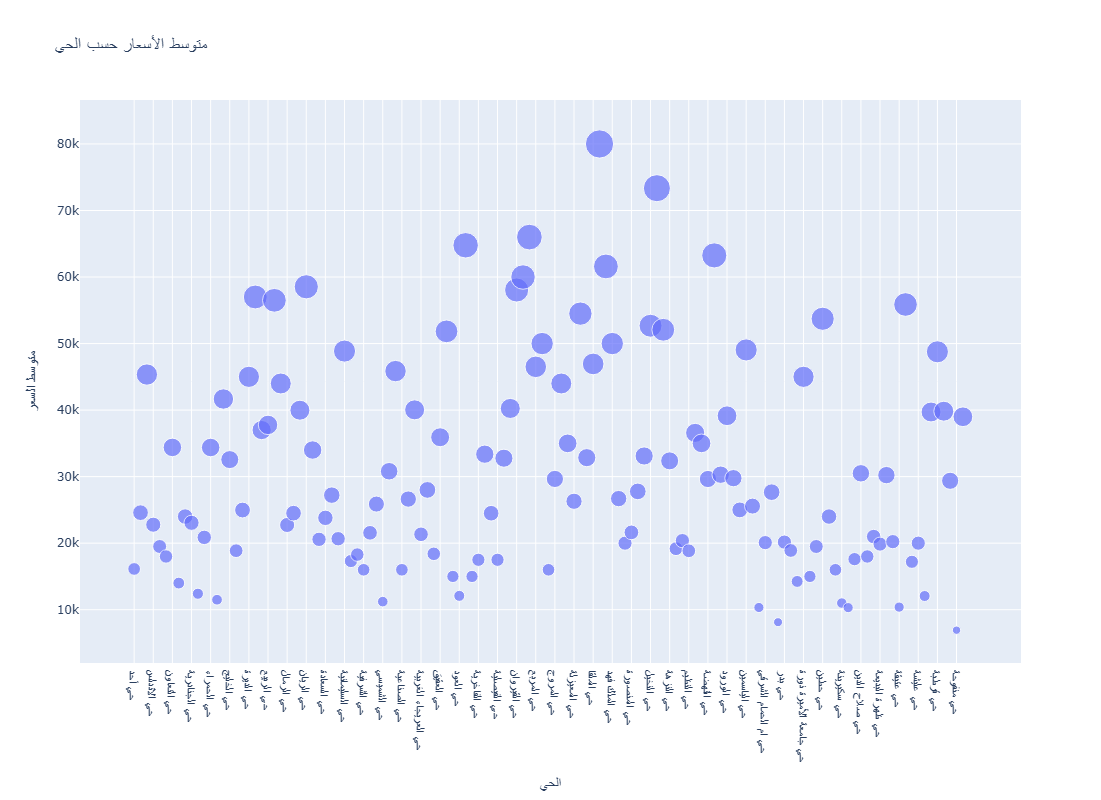

In [143]:
import pandas as pd
import plotly.express as px

# Load your dataset
# ra = pd.read_csv('your_file.csv')  # Uncomment to load your dataset

# Remove rows with NaN values in the 'السعر' column
ra_cleaned = ra.dropna(subset=['السعر'])

# Calculate the mean price by district
mean_price_data = ra_cleaned.groupby('الحي')['السعر'].mean().reset_index()

# Rename the columns for clarity
mean_price_data.columns = ['الحي', 'متوسط السعر']

# Create a scatter plot for average prices by district
fig = px.scatter(
    mean_price_data,
    x='الحي',
    y='متوسط السعر',
    title='متوسط الأسعار حسب الحي',
    labels={'متوسط السعر': 'متوسط السعر', 'الحي': 'الحي'},
    size='متوسط السعر',  # Size markers based on average price
    hover_name='الحي',    # Show district name on hover
    height=800,
    width=1200
)

# Show the figure
fig.show()


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

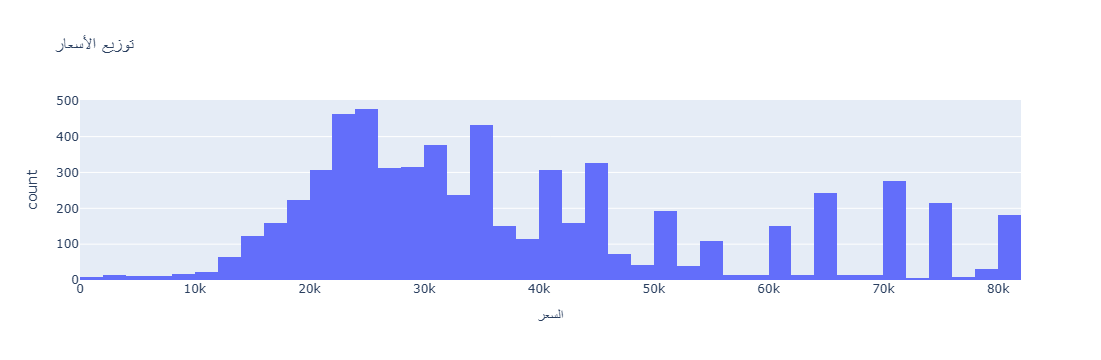

In [144]:
#توزيع الأسعار

# Create a histogram to visualize the distribution of prices
fig = px.histogram(
    ra, 
    x='السعر', 
    title='توزيع الأسعار',
    labels={'السعر': 'السعر'},
    nbins=60  # You can adjust the number of bins as needed
)

# Show the figure
fig.show()


### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

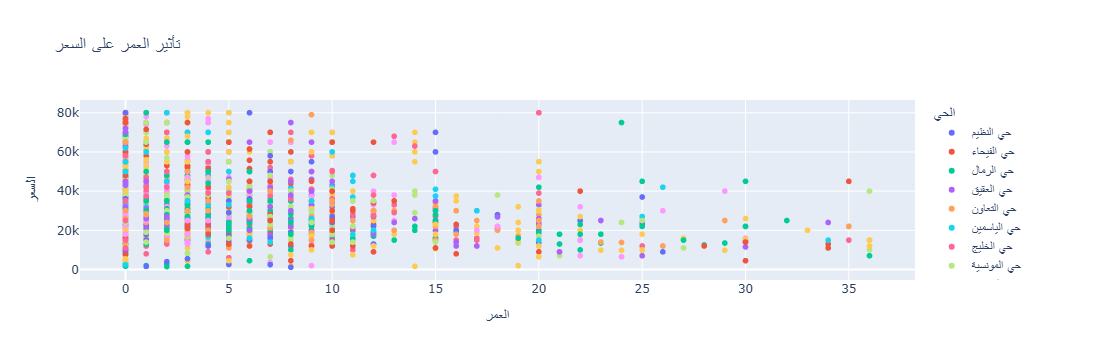

In [82]:
# Create a scatter plot to show the relationship between age and price
fig = px.scatter(
    ra, 
    x='العمر', 
    y='السعر', 
    title='تأثير العمر على السعر',
    labels={'العمر': 'العمر', 'السعر': 'السعر'},
    color='الحي'  # Optionally color by district for additional context
)

# Show the figure
fig.show()


**Categorical & numerical --> (scatter plot, histogram, box plot)**

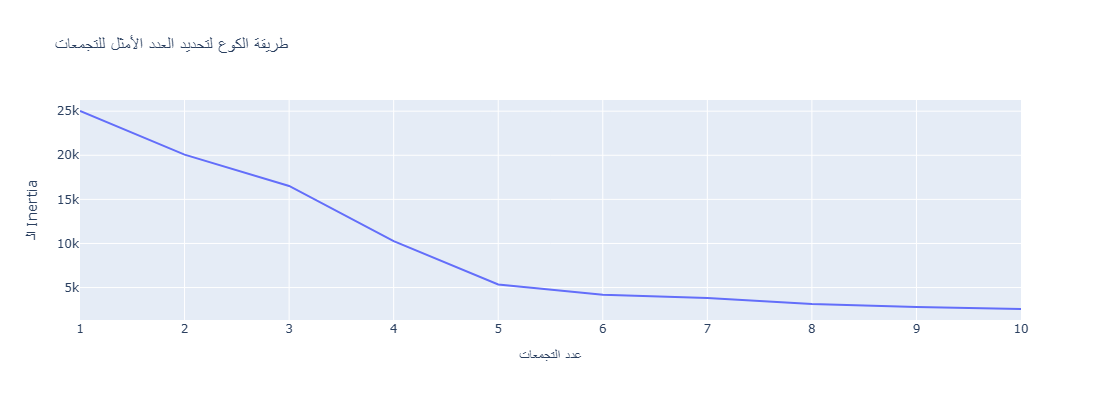

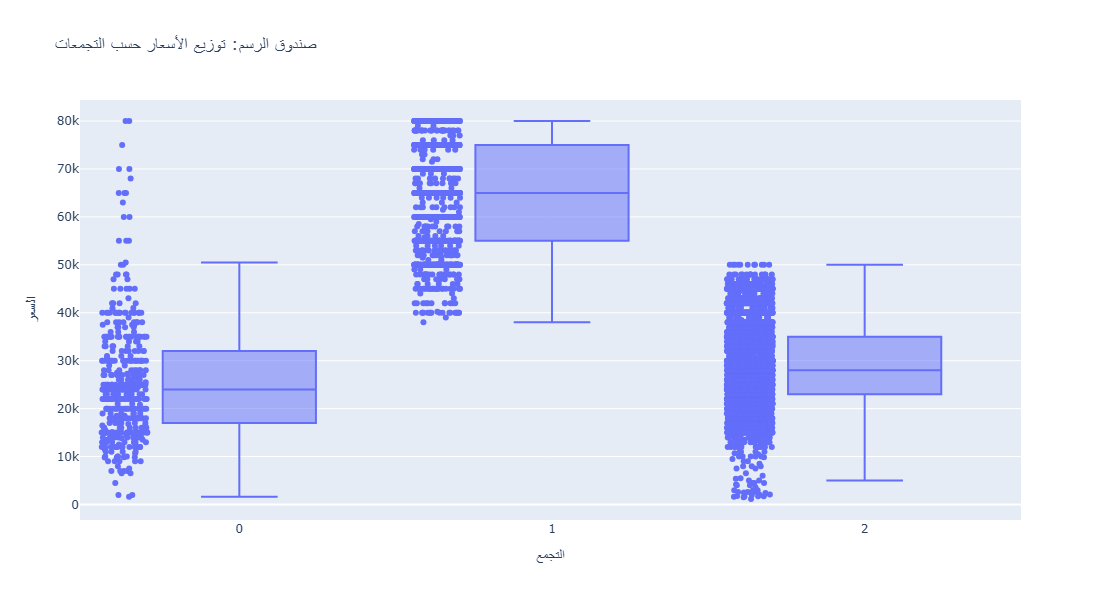

In [158]:

# Select relevant features including the new review feature
features = ra[['السعر', 'المساحة', 'العمر', 'مراجعة']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Create Elbow Curve plot using Plotly
elbow_fig = px.line(
    x=range(1, 11),
    y=inertia,
    labels={'x': 'عدد التجمعات', 'y': 'الـ Inertia'},
    title='طريقة الكوع لتحديد العدد الأمثل للتجمعات'
)

# Set dimensions for Elbow Curve
elbow_fig.update_layout(width=800, height=400)
elbow_fig.show()

# Fit K-means with the chosen number of clusters (e.g., 3)
optimal_clusters = 3  # Choose based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
ra['Cluster'] = np.nan
ra.loc[features.index, 'Cluster'] = clusters

# Create a box plot using Plotly
box_fig = px.box(
    ra,
    x='Cluster',       # X-axis: Cluster
    y='السعر',        # Y-axis: السعر
    title='صندوق الرسم: توزيع الأسعار حسب التجمعات',
    labels={'السعر': 'السعر', 'Cluster': 'التجمع'},
    points='all'  # Show all points
)

# Set dimensions for the box plot
box_fig.update_layout(width=800, height=600)

box_fig.show()


# Arabic: "تحليل توزيع الأسعار حسب التجمعات: يظهر الرسم البياني كيف تختلف أسعار العقارات بين التجمعات المختلفة، مما يساعد في فهم التوجهات السوقية."

#English: "Price Distribution Analysis by Clusters: The box plot illustrates how property prices vary across different 
#clusters, aiding in understanding market trends."


**numerical & numerical --> (Scatter plot, line chart)**